<a href="https://colab.research.google.com/github/marcociav/lango/blob/master/model-building/model_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.metrics import confusion_matrix

import seaborn as sns
from matplotlib import pyplot as plt

import pickle
import json

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  print("Invalid device or cannot modify virtual devices once initialized.")
  pass

In [3]:
v = 'v2'
DEBUG = True
MAXLEN = 140

In [4]:
%%time
lango_model = load_model(f'models/lango_model_{v}')
with open(f'models/utils/tokenizer_{v}.pickle', 'rb') as f:
  tok = pickle.load(f)

CPU times: total: 10.3 s
Wall time: 10.4 s


In [22]:
with open('models/utils/num_to_lan.json') as f:
  num_to_lan = json.load(f)
with open('models/utils/lan_to_language.json') as f:
  lan_to_language = json.load(f)

In [5]:
%%time
df = pd.read_csv('data/test_set.csv')

CPU times: total: 2.39 s
Wall time: 2.39 s


In [6]:
if DEBUG:
  df = df.sample(frac=0.5)

In [7]:
X_test = df['sentence'].values
y_test = df['lan_code'].values

del df

In [8]:
X_test

array(['„Како си?“ „Добро, фала!“', "C'est très humide, non\xa0?",
       'Často musíme venčit psa také v noci.', ..., 'Tliḍ taɣellayt?',
       'Er is een baan vrij in de winkel aan de overkant van de straat.',
       'Mi vidis ilin nur dufoje.'], dtype=object)

In [9]:
%%time
X_test = tok.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, padding='post', maxlen=MAXLEN, truncating='post')

CPU times: total: 13.4 s
Wall time: 13.4 s


In [10]:
%%time
y_pred = lango_model.predict(X_test, batch_size=512, verbose=1)

2020/2020 [==============================] - 35s 17ms/step
CPU times: total: 39.4 s
Wall time: 35.9 s


In [19]:
y_pred.argmax(axis=1)

array([ 75,   3,  27, ..., 120,  10,  11], dtype=int64)

In [31]:
%%time
conf_mat = confusion_matrix(
    y_test, 
    y_pred.argmax(axis=1)
)
conf_mat_perc = conf_mat / conf_mat.astype(np.float64).sum(axis=1)
conf_mat_perc.max()

CPU times: total: 812 ms
Wall time: 814 ms


1.3333333333333333

<AxesSubplot:>

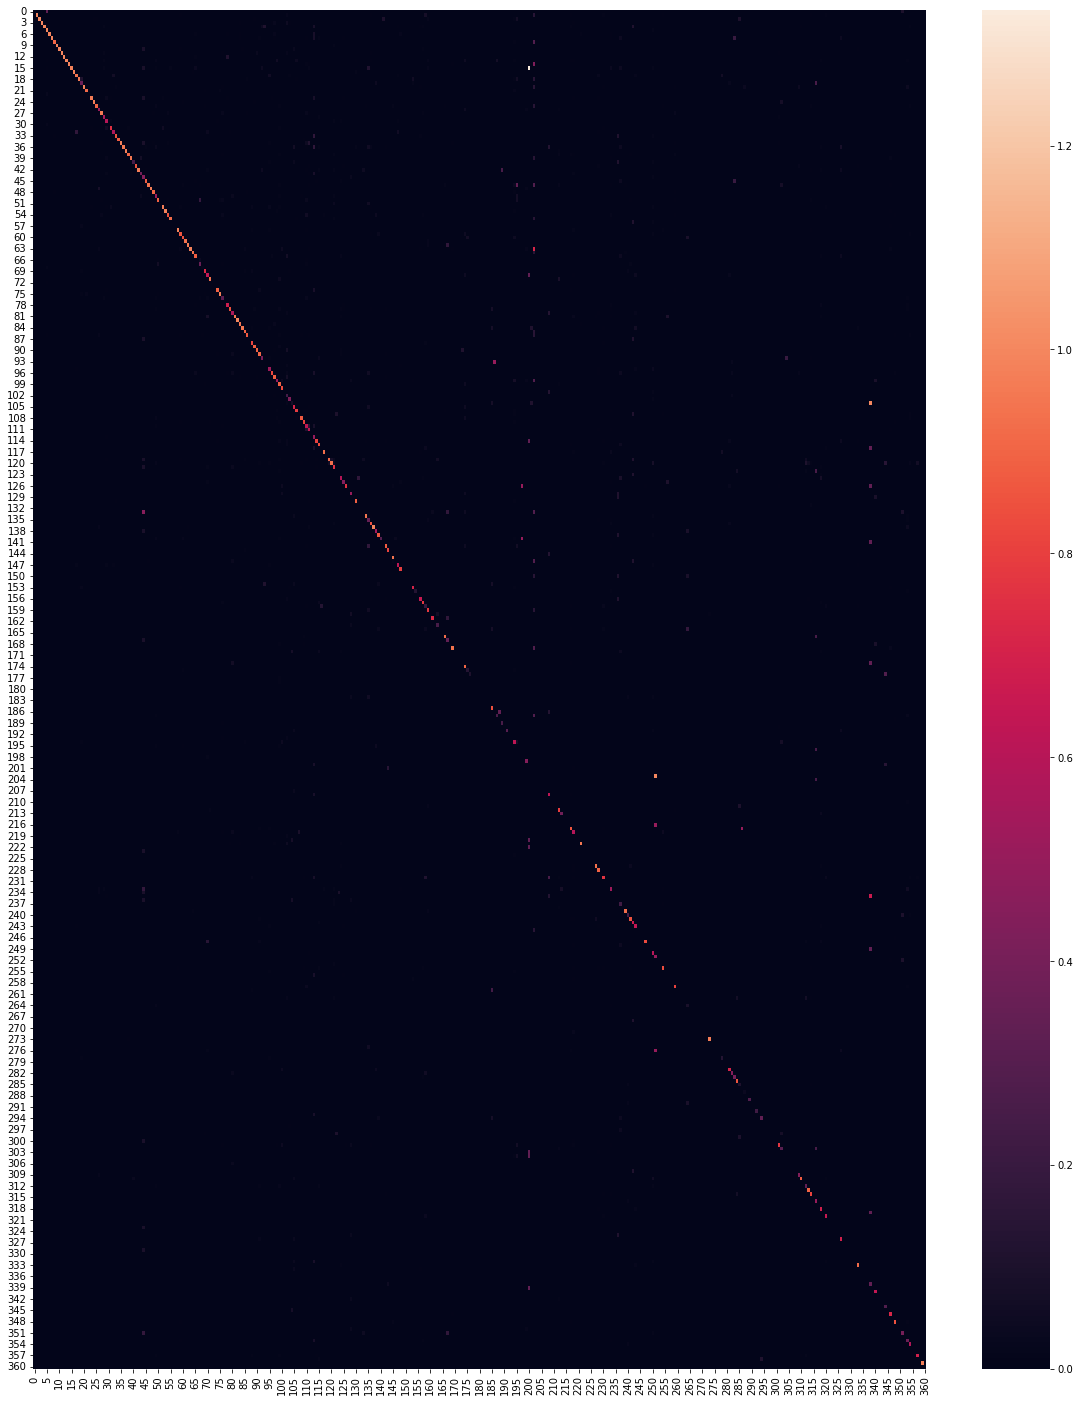

In [32]:
plt.figure(figsize=(20, 25))
sns.heatmap(conf_mat_perc)